In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append('/Users/lucastian/code/neuralmonkey')
sys.path.append('/Users/lucastian/code/pythonlib')

In [1]:
from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

In [2]:
# load all sessions for Pancho on 221020
MS = load_mult_session_helper(221020, 'Pancho')

Searching using this string:
/mnt/Freiwald/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-161238
session:  0
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/Freiwald/ltian/recordings/Pancho/221020/Pancho-221020-161238
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [2, 3]
Beh Sessions that exist on this date:  {221020: [(2, 'dirshapecolor1b'), (3, 'dirshapecolor1b')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['dirshapecolor1b']
Loading these beh sessions: [2]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/Freiwald/ltian/recordings/Pancho/221

In [3]:
sn = MS.SessionsList[0]

In [25]:
sn.sitegetter_all()??


SyntaxError: invalid syntax (2921848490.py, line 1)

In [4]:
# get a summary of e.g. units per brain region
MS.print_summary_sessions()

=== N trials per session
601
170
=== N units per session

====== SESSION NUM:  0
M1_m  :  19
M1_l  :  19
PMv_l  :  9
PMv_m  :  12
PMd_p  :  16
PMd_a  :  12
dlPFC_p  :  12
dlPFC_a  :  10
vlPFC_p  :  26
vlPFC_a  :  12
FP_p  :  9
FP_a  :  2
SMA_p  :  23
SMA_a  :  15
preSMA_p  :  25
preSMA_a  :  22
 ------- 
TOTAL:  243
MIN:  2
MAX:  26
MEAN:  15.1875
--------
BAD SITES (n sites)
sites_garbage 26
sites_low_fr 220
sites_low_spk_magn 250
Total (accounting for overlap):  269
------
Summary for each overall region


AttributeError: 'Session' object has no attribute 'sitegetterKS_get_brainregion_list'

In [12]:
# get session 1
sn = MS.SessionsList[1]

In [13]:
# from this session, get list of sites (just a list of numbers)
sites = sn.sitegetter_all()

In [ ]:
# get all sites for a given brain region (list of numbers that ranges from 1:512)
sn.sitegetter_map_region_to_sites('vlPFC_a')

In [14]:
# get list of good (i.e. attempted) trials in this session (just a list of numbers)
trials = sn.get_trials_list(True) #only_if_ml2_fixation_success=True

In [23]:
import pandas as pd

pd.DataFrame()

In [21]:
# get spiketimes and other metadat for a given [SITE, CHANNEL]
sn.datall_slice_single_bysite(212,62)

{'rs': 2,
 'chan': 212,
 'trial0': 62,
 'pre_dur': 1.0,
 'post_dur': 1.0,
 'time_range': array([843.17830912, 858.54916864]),
 'raw': array([], dtype=float64),
 'tbins0': array([], dtype=float64),
 'fs': None,
 'spike_times': array([-0.67071758, -0.64053006, -0.5589787 , -0.43577102, -0.19640078,
         0.08667378,  0.10678514,  0.42553586,  0.5383397 ,  0.69742834,
         0.7781605 ,  0.78794994,  0.79663346,  0.81899762,  0.88129778,
         0.92012786,  0.9436389 ,  0.99909874,  1.00884722,  1.01318898,
         1.03276786,  1.06070258,  1.12349426,  1.14139378,  1.14204914,
         1.19439602,  1.23949298,  1.2827877 ,  1.32530418,  1.44363762,
         1.48947186,  1.58273778,  1.83034098,  1.93851634,  2.1101797 ,
         2.27447026,  2.29486834,  2.4403173 ,  2.59379442,  2.65744626,
         2.68067058,  2.8964069 ,  2.96136946,  2.97496818,  3.04480498,
         3.04853234,  3.07511538,  3.10845682,  3.11599346,  3.26598898,
         3.28069362,  3.3039589 ,  3.3475813 

TypeError: 'NoneType' object is not subscriptable

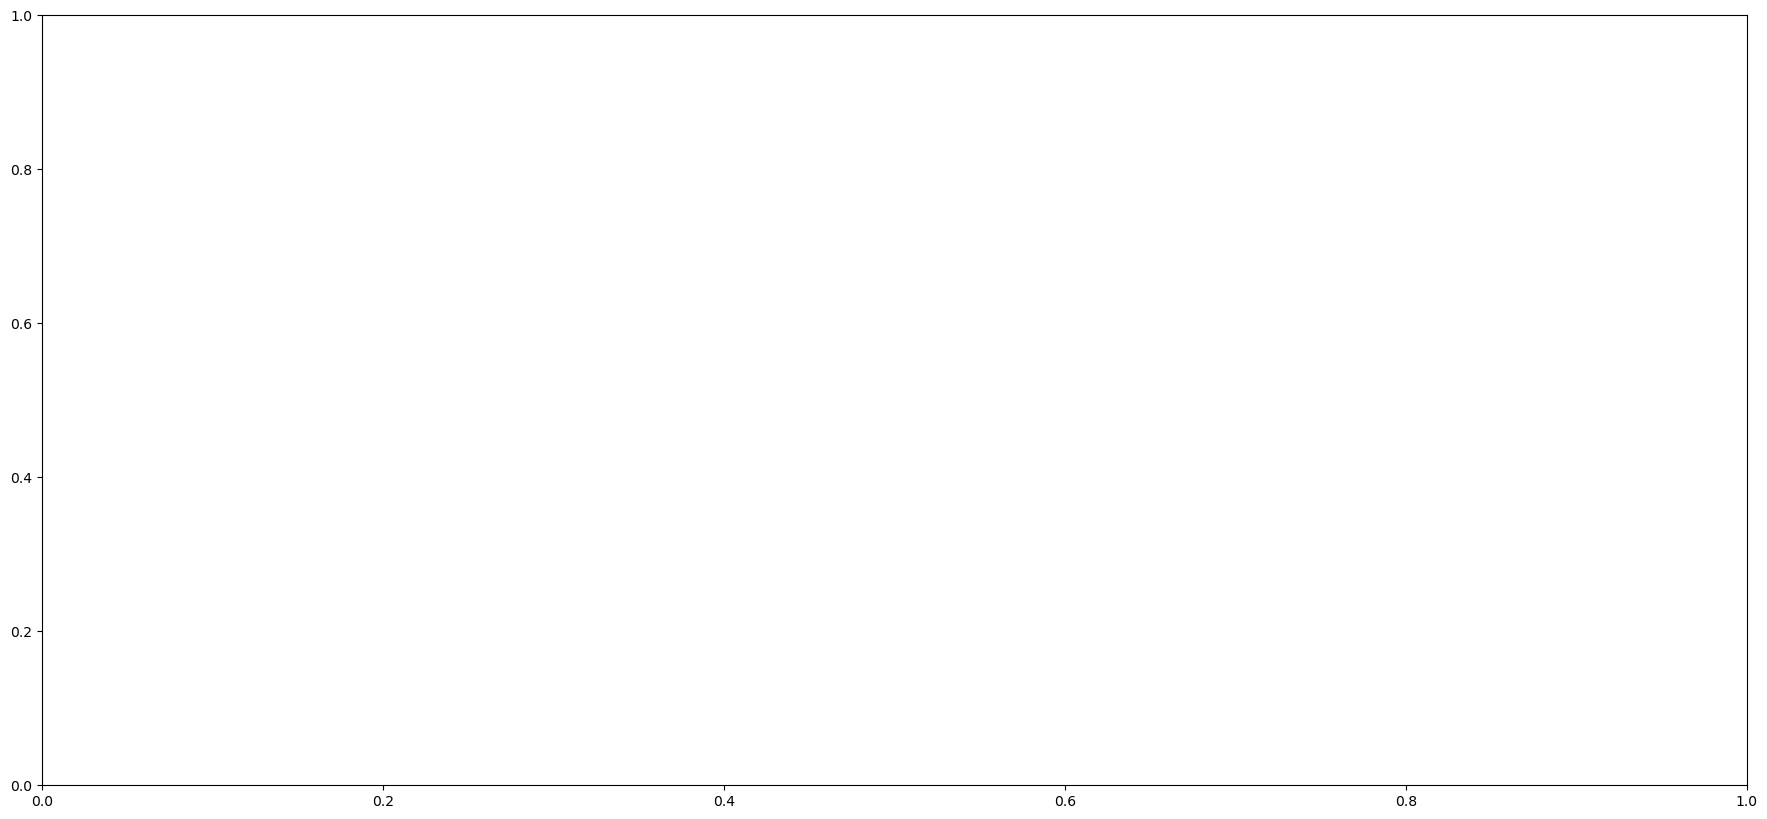

In [19]:
# plot multiple trials for a given site
trials = sn.get_trials_list()
sn.plotwrapper_raster_multrials_onesite(trials[80: 100], 62);

In [ ]:
# plot multiple trials for a given site, and align to a task event (e.g. go, doneb)
sn.plotwrapper_raster_multrials_onesite(trials[80: 100], 298, alignto="go");

In [ ]:
# plot one trial for MULTIPLE sites (also makes plots for photodiodes, eyetracking etc.)
sn.plotwrapper_raster_oneetrial_multsites(110,sites)

In [ ]:
# x-coordinate of eye, but in terms of voltage not screen
# (will have to scale/rotate to get screen coordinates)
times_x, vals_x, fs_x = sn.extract_data_tank_streams("eyex", 110, ploton=True)

In [ ]:
#%matplotlib notebook
times_y, vals_y, fs_y = sn.extract_data_tank_streams("eyey", 110, ploton=True)

In [ ]:
# EYE VISUALIZATION 1: dots
plt.figure()
plt.scatter(vals_x, vals_y)

In [ ]:
# EYE VISUALIZATION 2: heatmap (hex)
plt.figure()
plt.hexbin(vals_x, vals_y,cmap="cividis")

In [ ]:
# EYE VISUALIZATION 3: heatmap (hist2d)
plt.figure()
plt.hist2d(vals_x,vals_y,bins=40);

In [ ]:
# ???
fig, ax = plt.subplots(1,1)
sn.plotwrapper_smoothed_multtrials_multsites_timewindow(sites[:1], trials[:20], ax=ax)

In [ ]:
# aligning neural trial # to behavior trial # (as there is usually an offset)
t = trials[90]
idx = sn.datasetbeh_trial_to_datidx(t)
print(t, idx)
sn.Datasetbeh.Dat.iloc[idx]

In [ ]:
# --- make histogram of diffs, is it bimodal? (if so, split as saccades/fixations, otherwise )
d = np.diff(vals_x); 
d = d[np.abs(d) < 1];
t = np.arange(len(d));
plt.figure()
plt.plot(t,d)
#d2 = np.diff(d)
#d2_clean = d2[np.abs(d2) < 1]
#plt.hist(d2_clean,bins=100,log=True);

In [ ]:
##func(ax, eye_x_values, eye_y_values) --> ax (with drawing on top).
#import matplotlib.pyplot as plt
#fig, axes = plt.subplots(2,2)
#ax = axes.flatten()[3]
#ax.plot(1,1,'ok')

In [ ]:
# get affine-transformed data (e.g. relative to screen)
x_aff = sn.beh_extract_eye_good(113)[1][:,0]
y_aff = sn.beh_extract_eye_good(113)[1][:,1]

# SMOOTH DATA
from pythonlib.pythonlib.tools.timeseriestools import smoothDat
x_aff_sm = smoothDat(x_aff, window_len=10)
y_aff_sm = smoothDat(y_aff, window_len=10)

In [ ]:
strk = sn.strokes_extract(113)

# get time of first element in each array, for "stroke onset", and then subsample data for eyetracking on this
onset = strk[0][0,2]
offset = strk[-1][-1,2]

In [ ]:
times = sn.beh_extract_eye_good(113)[0]
inds = (times>onset) & (times<offset)

plt.figure()
plt.scatter(x_aff_sm[inds], y_aff_sm[inds],c=range(sum(inds)))

In [ ]:
# yarbus
plt.figure()
plt.scatter(x_aff_sm, y_aff_sm,c=range(len(x_aff_sm)))

In [ ]:
fig, ax = plt.subplots(1,1)
sn.plot_final_drawing(ax, 113)

In [ ]:
# heatmap
plt.figure()
plt.hist2d(x_aff_sm,y_aff_sm,bins=100);

In [ ]:
# x-plot
plt.figure()
times = range(0,len(x_aff_sm))
plt.plot(times,x_aff_sm)

In [ ]:
# y-plot
plt.figure()
plt.plot(times,y_aff_sm)

### Snippets

Collects data aligned to instances of a given event. Can then use the Snippets methods to do many things, plotting, analysis, etc.

In [ ]:
sn.datasetbeh_trial_to_trialcode(50)

In [ ]:
sn.datasetbeh_trialcode_to_trial(trialcode)


In [ ]:
from neuralmonkey.classes.snippets import Snippets, extraction_helper


In [ ]:
# Pick out a single session
sn = MS.SessionsList[0]


In [ ]:
# Turn on debug mode, this prunes sites and trials, so below runs faster
DEBUG = True
sn._DEBUG_PRUNE_SITES = DEBUG
sn._DEBUG_PRUNE_TRIALS = DEBUG


In [ ]:
# ****** FOR KEDAR: you would want to modify list_events to something like this:
list_events = ["saccon", "saccoff"]



In [ ]:
# Main code for extracting Snippets (SP)

# == MODIFY THESE:
list_events = ["go", "doneb"] # each event defines a snippet
list_pre_dur = [-0.5]
list_post_dur = [0.5]

# == IGNORE THESE:
which_level = "flex"
list_features_extraction = []
list_features_get_conjunction = []
trials_prune_just_those_including_events=False

SP = Snippets(sn,
    which_level,
    list_events,
    list_features_extraction,
    list_features_get_conjunction,
    list_pre_dur,
    list_post_dur,
    strokes_only_keep_single=False,
    tasks_only_keep_these=None,
    prune_feature_levels_min_n_trials=None,
    dataset_pruned_for_trial_analysis=None,
    trials_prune_just_those_including_events=trials_prune_just_those_including_events,
    fr_which_version='sqrt',
    NEW_VERSION=True,
    SKIP_DATA_EXTRACTION=False
             )


In [ ]:
# Inspect the data. 
# Each row represents a single combination of:
# (trial, chan, event). To see that, inspect the output of 

display(SP.DfScalar)

from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(SP.DfScalar, ["trialcode", "chan", "event_aligned"])


##### Plotting functions for Snippets

In [ ]:
# Rasters and smoothed FR, split by event
chan = 2
SP.plotgood_rasters_smfr_each_level_combined(chan, var="event")

In [ ]:
# you can further split data based on conjucntions of another set of variables.

# For example, let's make that same plot, but split subplots by epoch.
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP
SP.plotgood_rasters_smfr_each_level_combined(chan, var="event", vars_others=["epoch"]) # plot


In [ ]:
# We can plot the same data, but flipping which variable
SP.plotgood_rasters_smfr_each_level_combined(chan, var="epoch", vars_others=["event"]) # plot


In [ ]:
# You can even use conjucjtions of mltiple variables for splitting suybplots
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP
SP.datasetbeh_append_column("block", sn.Datasetbeh) # assign epoch to SP

SP.plotgood_rasters_smfr_each_level_combined(chan, var="event", vars_others=["epoch", "block"]) # plot

# Now each subplot is a specific conjucntion of the variables epoch and block.

##### == SCRATCH NOTES - IGNORE

In [ ]:
# trials = sn.get_trials_list(True)[:5]
# sites = sn.sitegetter_all()[:5]
# list_events = ["go", "doneb", "reward_all"]
# sn.snippets_extract_by_event_flexible(sites, trials, list_events)

# PA = sn.smoothedfr_extract_timewindow_bytimes(trials, 
#                                         times=[0.5 for _ in range(5)],
#                                         sites = sites)

##### Computing modulation of activity by certain variables

In [ ]:
# Run this. You need to first reextract SP, but NOT in DEBUG mode. Or else there is not enough
# data to compute modulation.

SP.modulationgood_compute_wrapper("epoch")